## Import dependencies

In [1]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

c:\Users\PC\Documents\Python Projects\DRL\venv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__


## Load Data 


In [2]:
df = pd.read_csv('../Dataset/process data/nasdaq_dataset.csv')

In [3]:
df.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,...,AROON_UP,ADX,STOCH_K,STOCH_D,MACD,MACD_SIGNAL,HAMMER,INVERTED_HAMMER,ENGULFING,Target
0,2011/6/13,20:00:00,1350.54,1350.54,1350.54,1350.54,0,0,0,0,...,21.428571,43.819322,40.615298,45.541867,-7.932664,-8.560322,0,0,0,0
1,2011/6/14,12:00:00,1363.16,1370.18,1363.16,1368.53,0,0,0,0,...,100.000000,42.298061,58.060659,48.180735,-6.232078,-8.094673,0,0,0,0
2,2011/6/14,13:00:00,1368.51,1374.46,1368.06,1373.62,0,0,0,0,...,100.000000,41.340922,76.586371,58.420776,-4.422650,-7.360269,0,0,0,0
3,2011/6/14,14:00:00,1373.62,1374.23,1370.97,1372.80,0,0,0,0,...,92.857143,40.452150,93.929978,76.192336,-3.020020,-6.492219,0,0,0,0
4,2011/6/14,15:00:00,1372.79,1373.59,1371.59,1372.15,0,0,0,0,...,85.714286,39.626862,93.361517,87.959288,-1.938528,-5.581481,0,0,0,0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
Time                       object
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                      int64
NumberOfTrades              int64
BidVolume                   int64
AskVolume                   int64
ATR                       float64
RSI                       float64
AD                        float64
AROON_DOWN                float64
AROON_UP                  float64
ADX                       float64
STOCH_K                   float64
STOCH_D                   float64
MACD                      float64
MACD_SIGNAL               float64
HAMMER                      int64
INVERTED_HAMMER             int64
ENGULFING                   int64
Target                      int64
dtype: object

In [5]:
df.set_index('Date', inplace=True)
df.drop(columns=['Time','Target'],inplace=True)
print(len(df))
df.head()

24519


,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,ATR,RSI,...,AROON_DOWN,AROON_UP,ADX,STOCH_K,STOCH_D,MACD,MACD_SIGNAL,HAMMER,INVERTED_HAMMER,ENGULFING
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-13,1350.54,1350.54,1350.54,1350.54,0,0,0,0,5.104920,34.686033,...,71.428571,21.428571,43.819322,40.615298,45.541867,-7.932664,-8.560322,0,0,0
2011-06-14,1363.16,1370.18,1363.16,1368.53,0,0,0,0,6.143140,54.838940,...,64.285714,100.000000,42.298061,58.060659,48.180735,-6.232078,-8.094673,0,0,0
2011-06-14,1368.51,1374.46,1368.06,1373.62,0,0,0,0,6.161487,58.719937,...,57.142857,100.000000,41.340922,76.586371,58.420776,-4.422650,-7.360269,0,0,0
2011-06-14,1373.62,1374.23,1370.97,1372.80,0,0,0,0,5.954238,57.857319,...,50.000000,92.857143,40.452150,93.929978,76.192336,-3.020020,-6.492219,0,0,0
2011-06-14,1372.79,1373.59,1371.59,1372.15,0,0,0,0,5.671792,57.140743,...,42.857143,85.714286,39.626862,93.361517,87.959288,-1.938528,-5.581481,0,0,0


In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,10000), window_size=5)

c:\Users\PC\Documents\Python Projects\DRL\venv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
c:\Users\PC\Documents\Python Projects\DRL\venv\lib\site-packages\gym\core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\PC\Documents\Python Projects\DRL\venv\lib\site-p

## Add Environment

In [7]:
def add_new_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Open', 'High', 'Low', 'Volume', 'NumberOfTrades', 'BidVolume',
       'AskVolume', 'ATR', 'RSI', 'AD', 'AROON_DOWN', 'AROON_UP', 'ADX',
       'STOCH_K', 'STOCH_D', 'MACD', 'MACD_SIGNAL', 'HAMMER',
       'INVERTED_HAMMER', 'ENGULFING']].to_numpy()[start:end]
    return prices, signal_features

In [8]:
class MyEnv(StocksEnv):
    _process_data = add_new_data
    
env2 = MyEnv(df=df, window_size=30, frame_bound=(30,18000))

In [9]:
env2.signal_features

array([[1350.54, 1350.54, 1350.54, ...,    0.  ,    0.  ,    0.  ],
       [1363.16, 1370.18, 1363.16, ...,    0.  ,    0.  ,    0.  ],
       [1368.51, 1374.46, 1368.06, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [5498.69, 5544.93, 5498.11, ...,    0.  ,    0.  ,    0.  ],
       [5552.8 , 5569.02, 5540.37, ...,    0.  ,    0.  ,    0.  ],
       [5557.2 , 5567.68, 5537.21, ...,    0.  ,    0.  , -100.  ]])

Build new environment for all data

## Build Environment and Train

In [10]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [11]:
# model = A2C('MlpPolicy', env, verbose=1) 
# model.learn(total_timesteps=1000000)

model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 602  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 445         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017126504 |
|    clip_fraction        | 0.0144      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000956   |
|    learning_rate        | 0.0003      |
|    loss                 | 179         |
|    n_updates            | 10          |
|    policy_gradient_loss | 0.000398    |
|    value_loss           | 305         |
-----------------------------------------
-----------------

KeyboardInterrupt: 

# 4. Evaluation

In [14]:
env = MyEnv(df=df, window_size=30, frame_bound=(18000,18500))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -491.07999999999765, 'total_profit': 0.24416073986866318, 'position': 1}


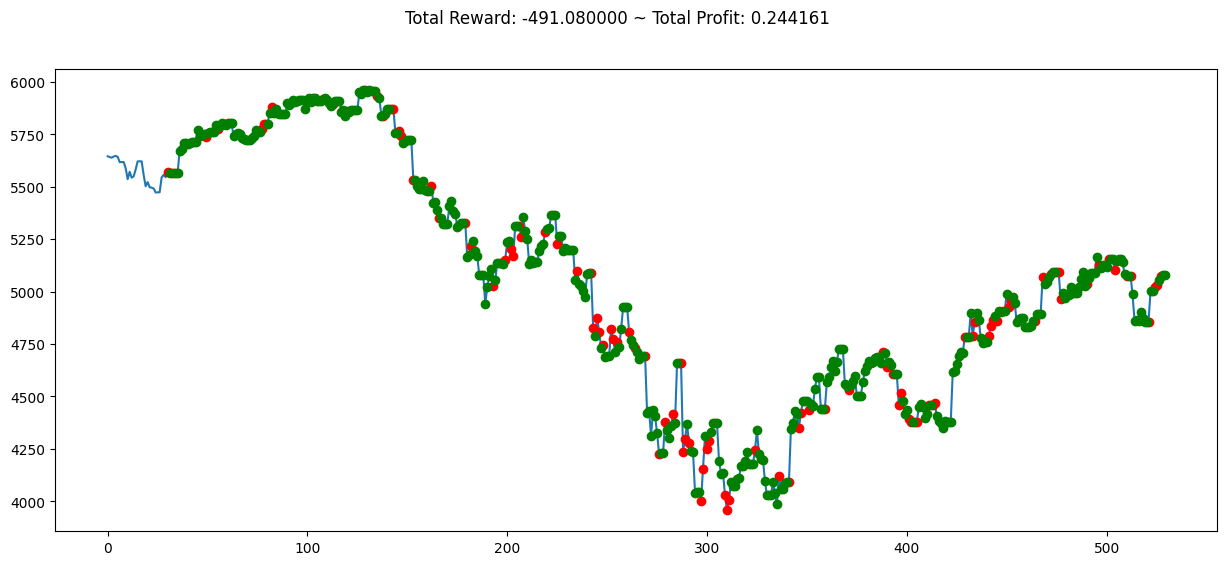

In [15]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [16]:
# Specify the file path and name for saving the model
save_path = "PPO_nasdaq_model_1"

# Save the model
model.save(save_path)

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 4.119999999999999, 'total_profit': 1.293094524478753, 'position': 1}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `E